In [1]:
## etc.
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "7"

import pandas as pd
from sklearn.model_selection import train_test_split

# torch unet
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm
import torchvision.models as models


# polygon
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


import torch.nn.functional as F
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils as utils

# เพิ่ม . 
def add_dot(df):
    cols = ['filename','mask_filename']
    for i in cols :
        #df[i] = df[i].apply(lambda x: '.' + x[1:])
        df[i] = df[i].str.replace('./dataset', '../dataset')
    return df

def encoder_class(dataframe):
    
    encoder = {'benign':1, 'malignant':2, 'normal':0}
    dataframe['class'] = [encoder[i] for i in dataframe['category']]
    
    return dataframe

train_path = '../dataset/unet/dataset-train-augment.csv'
train_df = pd.read_csv(train_path)
train_df = add_dot(train_df)

val_path = '../dataset/unet/dataset-validate-augment.csv'
val_df = pd.read_csv(val_path)
val_df = add_dot(val_df)

test_path = '../dataset/unet/dataset-test-augment.csv'
test_df = pd.read_csv(test_path)
test_df = add_dot(test_df)

print('train:',train_df.shape,'\ntest:',test_df.shape,'\nvalidate:',val_df.shape)
#visual_image(train_df)


train: (2535, 3) 
test: (726, 3) 
validate: (363, 3)


In [2]:
test_df = encoder_class(test_df)
image = test_df.sample(1)

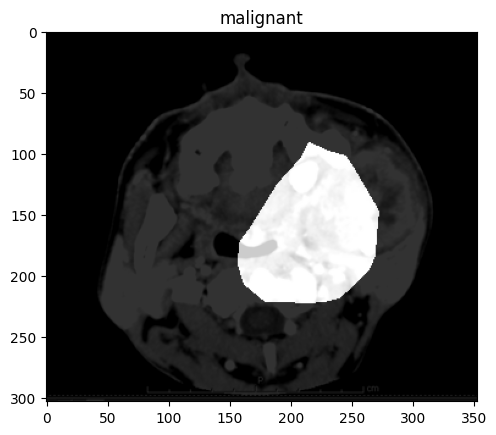

In [3]:
# Combine model
from Model import UnetResClassifier
img_path = image.iloc[0, 0]
img = Image.open(img_path).convert('RGB')
mask_path = image.iloc[0, 1]
mask = Image.open(mask_path).convert('RGB')
plt.imshow(mask)
plt.title(image.iloc[:,2].values[0])
plt.imshow(img,alpha=0.2)

Save output success!! where : Model/output_image/...


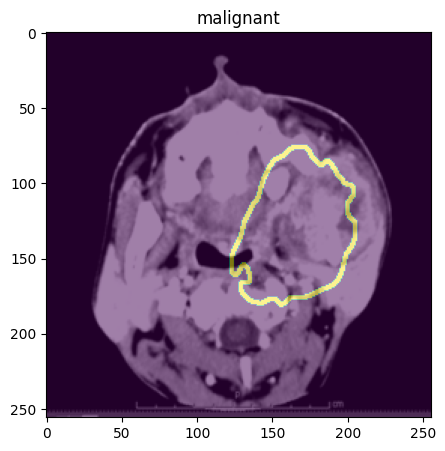

In [5]:
UnetResClassifier().Classifier(image=img,
                               height_output=5,
                               width_output=5,
                               save_image=True)